In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Discretizer

In [259]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.dropna(inplace=True)

In [260]:
x=df.iloc[:,1:]
y=df["Survived"]

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [262]:
x_train

,Age,Fare
387,36.0,13.0000
685,25.0,41.5792
20,35.0,26.0000
331,45.5,28.5000
396,31.0,7.8542
...,...,...
883,28.0,10.5000
238,19.0,10.5000
789,46.0,79.2000
704,26.0,7.8542


In [263]:
x_test.shape

(143, 2)

now we will do training without encoding and calculate accuracy

In [264]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [265]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [266]:
# we will calculate accuracy
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.6223776223776224


cross val score
- while calculating cross val score we have to pass function,x,y,scoring=r2/acuracy,cv=how many times

In [267]:
np.mean(cross_val_score(dt,x,y,scoring="accuracy",cv=10))

np.float64(0.6331377151799688)

# now we will do encoding on numerical variable

In [268]:
transformer=ColumnTransformer(transformers=[
    ("first",KBinsDiscretizer(n_bins=10,strategy="uniform",encode="ordinal"),[0]),
    ("second",KBinsDiscretizer(n_bins=10,strategy="quantile",encode="ordinal"),[1])
],remainder="passthrough")

In [269]:
x_train_transform=transformer.fit_transform(x_train)
x_test_transform=transformer.transform(x_test)

C:\Users\kaleg\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [270]:
x_train_transform

array([[4., 4.],
       [3., 8.],
       [4., 6.],
       ...,
       [5., 9.],
       [3., 1.],
       [5., 9.]], shape=(571, 2))

In [271]:
dt=DecisionTreeClassifier()
dt.fit(x_train_transform,y_train)

y_pred=dt.predict(x_test_transform)

In [272]:
accuracy_score(y_test,y_pred)

0.6433566433566433

cross val score

In [273]:
x_transform=transformer.fit_transform(x)
print("cross val",np.mean(cross_val_score(dt,x_transform,y,scoring="accuracy",cv=10)))

cross val 0.659839593114241


C:\Users\kaleg\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [274]:
def encode(bins,strategy,encode):
    transformer=ColumnTransformer(transformers=[
        ("first",KBinsDiscretizer(n_bins=bins,encode=encode,strategy=strategy),[0]),
        ("second",KBinsDiscretizer(n_bins=bins,encode=encode,strategy=strategy),[1])
    ],remainder="passthrough")
    x_train_transform=transformer.fit_transform(x_train)

    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.hist(x_train["Age"])
    plt.title("before transform")

    plt.subplot(122)
    plt.hist(x_train_transform[:,0],color="red")
    plt.title("after transform")
    plt.show()

    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.hist(x_train["Fare"])
    plt.title("before transform")

    plt.subplot(122)
    plt.hist(x_train_transform[:,1],color="red")
    plt.title("after transform")
    plt.show()

C:\Users\kaleg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kaleg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


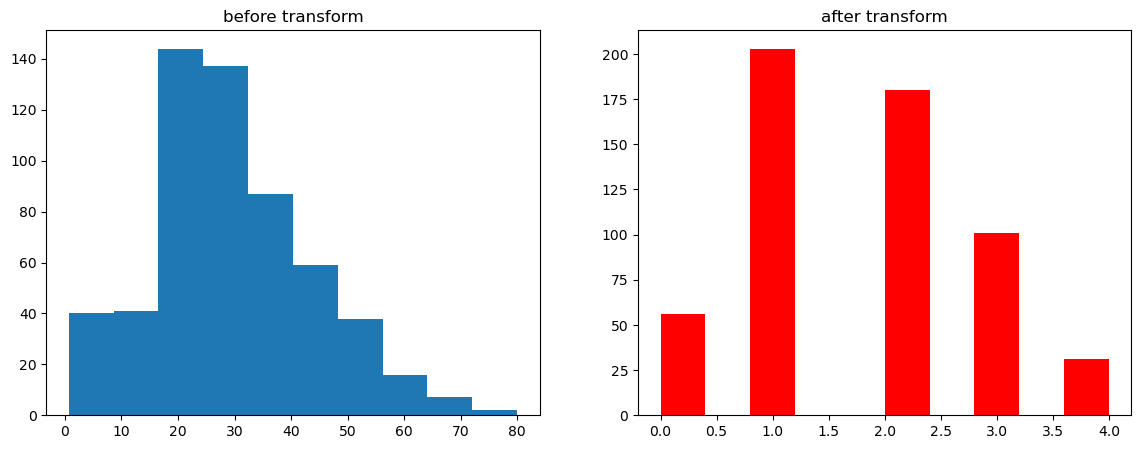

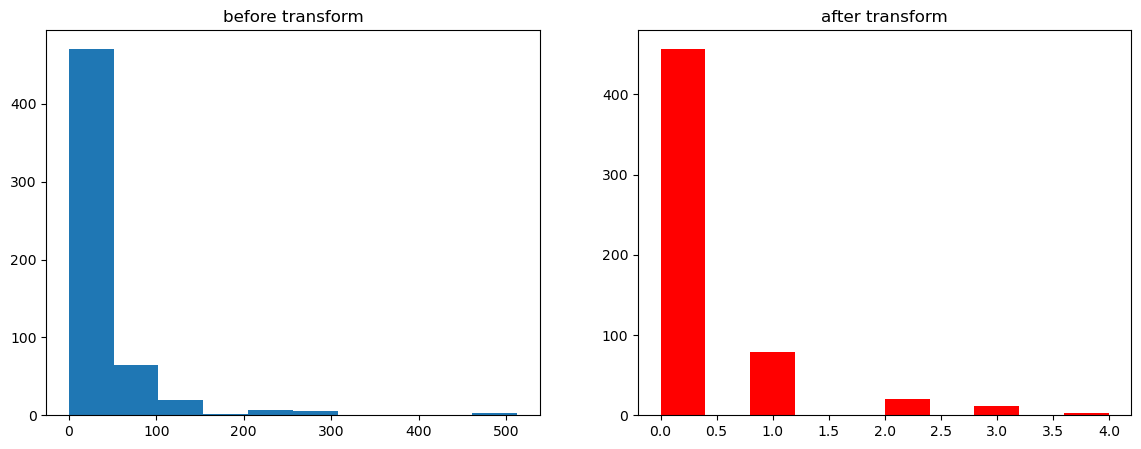

In [275]:
encode(5,"kmeans","ordinal")

# Binarization

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Binarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [277]:
df=pd.read_csv("train.csv",usecols=["Age","Survived","SibSp","Parch","Fare"])
df["family"]=df["SibSp"]+df["Parch"]

In [278]:
df

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
888,0,NaN,1,2,23.4500,3
889,1,26.0,0,0,30.0000,0


In [279]:
x=df[["Age","Fare","family"]]
y=df["Survived"]

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [281]:
x_train.shape

(712, 3)

In [282]:
x_test.shape

(179, 3)

In [283]:
# predict without transform

In [284]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [285]:
accuracy_score(y_test,y_pred)

0.7039106145251397

In [286]:
print("decision tree",np.mean(cross_val_score(dt,x,y,cv=10,scoring="accuracy")))

decision tree 0.6442322097378277


- now we will do binarization

- in binarizer we have to pass threshold=the value from which it will devide 0 and 1,copy=True/False true make new column false does not make new column it convert that column

In [287]:
trf=ColumnTransformer(transformers=[
    ("family",Binarizer(threshold=0,copy=False),["family"])
],remainder="passthrough")

In [308]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.transform(x_test)

In [296]:
x_train_transform_df=pd.DataFrame(x_train_transform,columns=["Family","Age","Fare"])
x_test_transform_df=pd.DataFrame(x_test_transform,columns=["Family","Age","Fare"])

In [300]:
dt=DecisionTreeClassifier()
dt.fit(x_train_transform_df,y_train)

y_pred=dt.predict(x_test_transform_df)

In [302]:
accuracy_score(y_test,y_pred)

0.6759776536312849

In [306]:
trf=ColumnTransformer(transformers=[
    ("family",Binarizer(threshold=0,copy=True),["family"])
],remainder="passthrough")

x_transform=trf.fit_transform(x)

In [314]:
x_transform_df=pd.DataFrame(x_transform,columns=["family","Age","Fare"])
dt=DecisionTreeClassifier()

In [319]:
# cross val score

In [322]:
print("deciion",np.mean(cross_val_score(dt,x_transform_df,y,scoring="accuracy",cv=10)))

deciion 0.6532209737827716
